In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import ptitprince as pt
import seaborn as sns
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures
import textstat
import spacy

In [2]:
main_file="C:/Users/jlsan/OneDrive/JEP_LARGE_DATASET/DATA.csv"
data=pd.read_csv(main_file)
pd.set_option('display.max_colwidth', None)

In [3]:
data_df=pd.DataFrame(data)


In [7]:
nlp = spacy.load('es_core_news_sm')

In [4]:
def calcular_indices(texto):
    indices = {
        'Flesch Reading Ease': textstat.flesch_reading_ease(texto),
        'Flesch-Kincaid Grade Level': textstat.flesch_kincaid_grade(texto),
        'Gunning FOG Index': textstat.gunning_fog(texto),
        'SMOG Index': textstat.smog_index(texto),
        'Automated Readability Index': textstat.automated_readability_index(texto),
        'Coleman-Liau Index': textstat.coleman_liau_index(texto),
        'Linsear Write Formula': textstat.linsear_write_formula(texto),
        'Dale-Chall Readability Score': textstat.dale_chall_readability_score(texto),
        'Readability Consensus': textstat.text_standard(texto)
    }
    return indices
    

In [5]:
resultados=data_df['TEXT'].apply(calcular_indices)
resultados_df = resultados.apply(pd.Series)
df = pd.concat([data_df, resultados_df], axis=1)

In [8]:
df.columns

Index(['INDEX', 'TEXT', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level',
       'Gunning FOG Index', 'SMOG Index', 'Automated Readability Index',
       'Coleman-Liau Index', 'Linsear Write Formula',
       'Dale-Chall Readability Score', 'Readability Consensus'],
      dtype='object')

In [16]:
positions1=[2,3,4]
positions2=[5,6,7]
positions3=[8,9]
COLUMNS1=df.iloc[:,positions1].columns
COLUMNS2=df.iloc[:,positions2].columns
COLUMNS3=df.iloc[:,positions3].columns
col_series1=pd.Series(COLUMNS1)
col_series2=pd.Series(COLUMNS2)
col_series3=pd.Series(COLUMNS3)

In [11]:
print(col_series1)
print(col_series2)
print(col_series3)

0           Flesch Reading Ease
1    Flesch-Kincaid Grade Level
2             Gunning FOG Index
dtype: object
0                     SMOG Index
1    Automated Readability Index
2             Coleman-Liau Index
dtype: object
0           Linsear Write Formula
1    Dale-Chall Readability Score
2           Readability Consensus
dtype: object


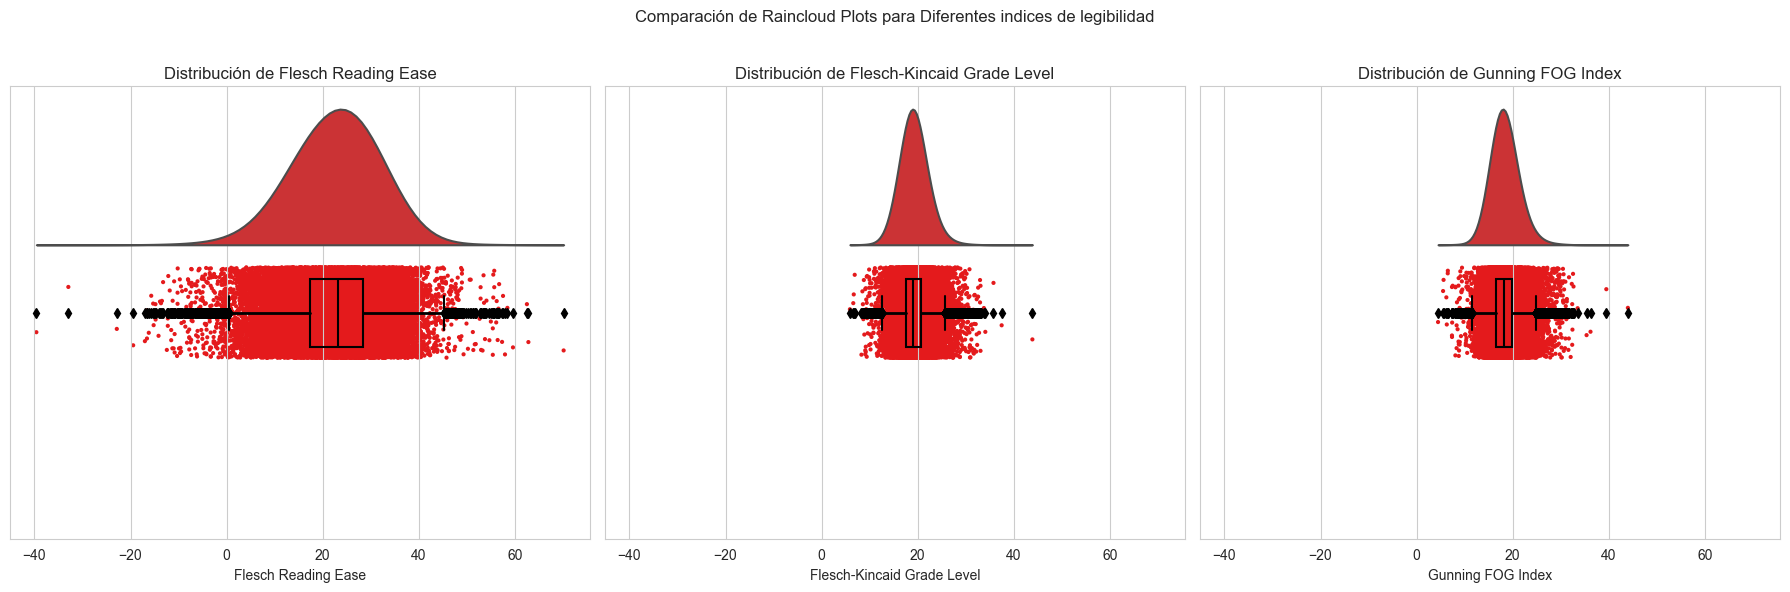

In [12]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS1):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index1.png')
plt.show()

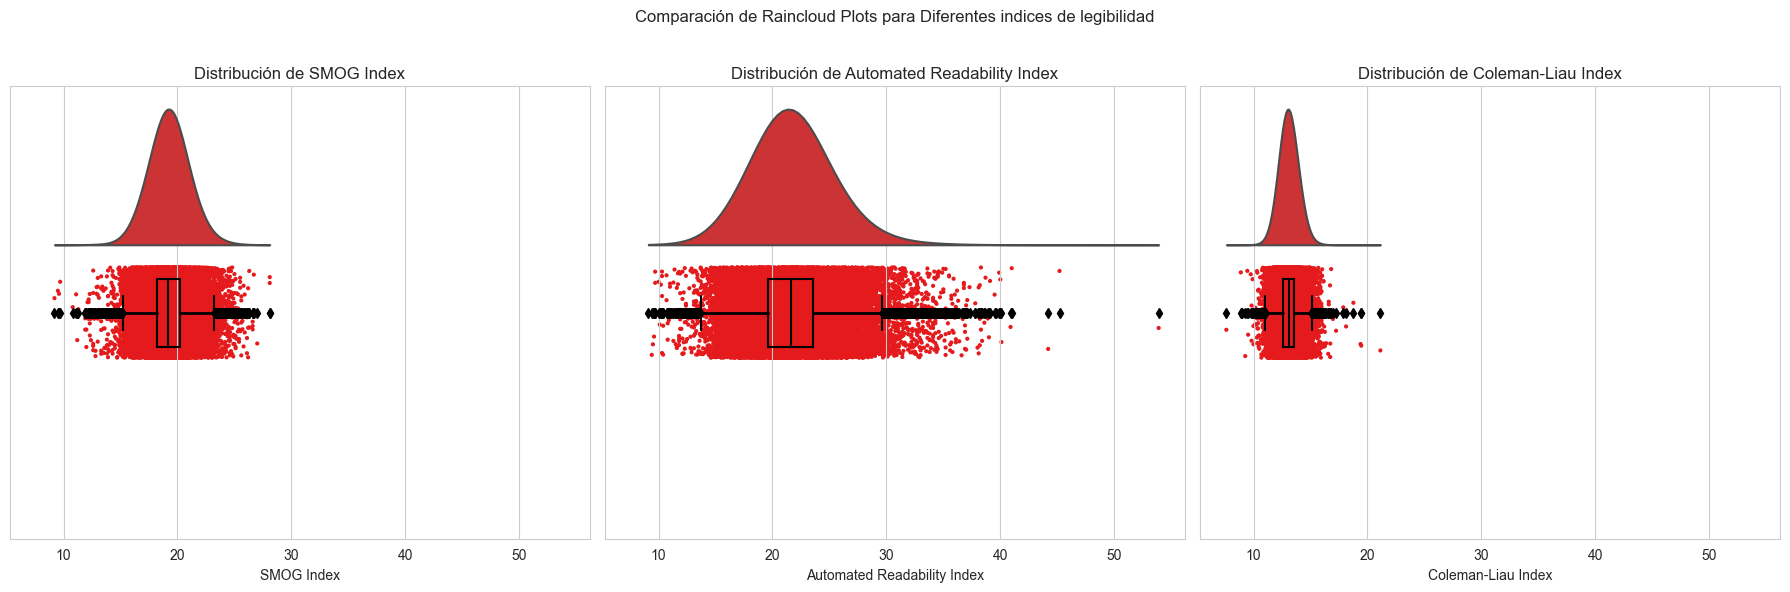

In [14]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS2):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index2.png')
plt.show()

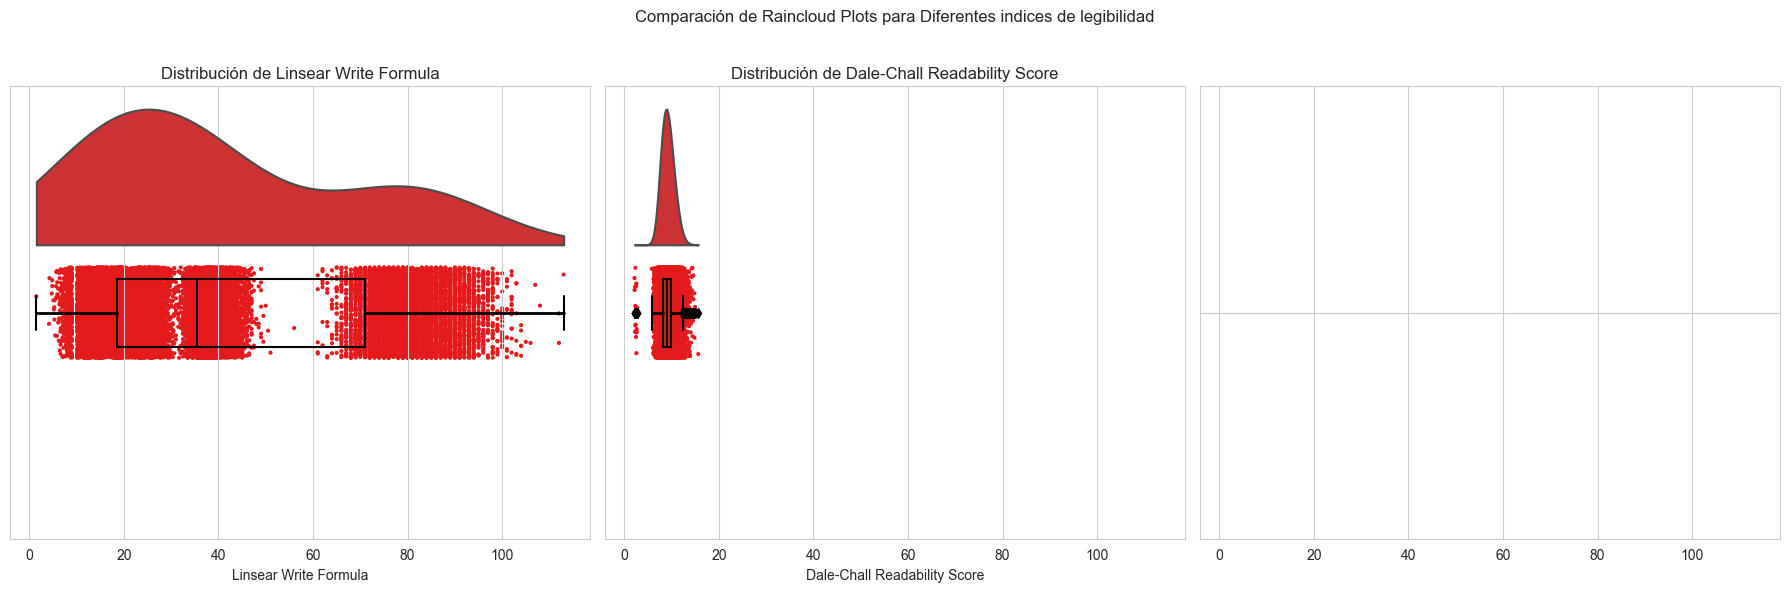

In [17]:
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


ort = "h"
pal = "Set1"


for ax, col in zip(axes, COLUMNS3):
    pt.half_violinplot(x=col, y=None, data=df, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
    sns.stripplot(x=col, data=df, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
    sns.boxplot(x=col, data=df, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
    ax.set_title(f"Distribución de {col}")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes indices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_index3.png')
plt.show()

## Índices relevantes (ES)

In [4]:
def calcular_indices_es(texto):
    indexes = {
        'Fernandez-Huerta':textstat.fernandez_huerta(texto),
        'Szigriszt-Pazos ':textstat.szigriszt_pazos(texto)
    }
    return indexes

In [9]:
results=data_df['TEXT'].apply(calcular_indices_es)
results_df = results.apply(pd.Series)
df_es = pd.concat([data_df, results_df], axis=1)

In [20]:
df_es.columns

Index(['INDEX', 'TEXT', 'Fernandez-Huerta', 'Szigriszt-Pazos '], dtype='object')

In [24]:
df_es

INDEX  \
0        A001-00   
1        A001-01   
2        A001-02   
3        A001-03   
4        A001-04   
...          ...   
35732   T-999-08   
35733   T-999-10   
35734   T-999-12   
35735   T-999-99   
35736  T-999A-01   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [21]:
pos_es=[2,3]
COLS_es=df_es.iloc[:,pos_es].columns
col_series_es=pd.Series(COLS_es)


In [27]:
col_series_es

0    Fernandez-Huerta
1    Szigriszt-Pazos 
dtype: object

In [33]:
COLS_es

Index(['INDEX', 'TEXT', 'Fernandez-Huerta', 'Szigriszt-Pazos '], dtype='object')

Plotting column: Fernandez-Huerta
Plotting column: Szigriszt-Pazos 


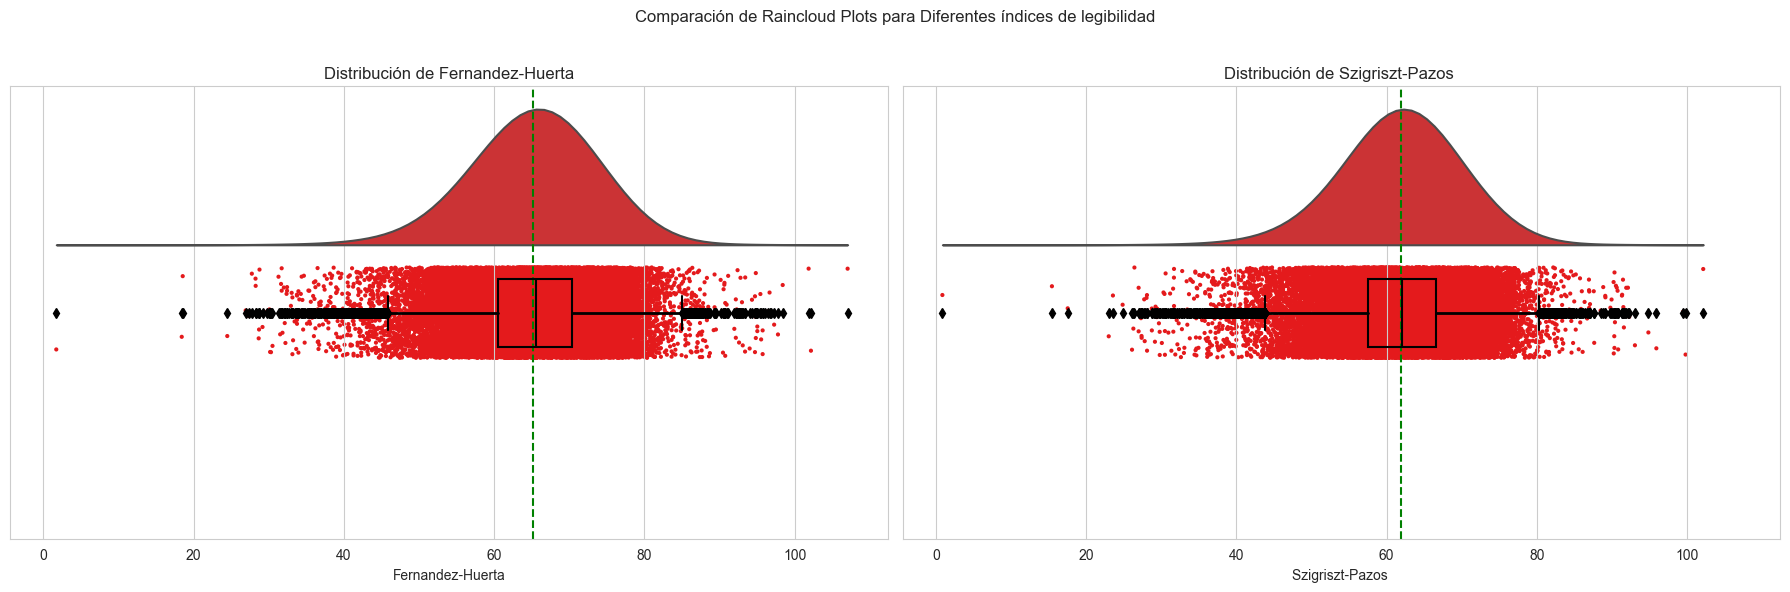

In [48]:
f, axes = plt.subplots(1, len(col_series_es), figsize=(18, 6), sharex=True, sharey=True)

ort = "h"
pal = "Set1"

for ax, col in zip(axes, col_series_es):
    print(f"Plotting column: {col}")  # Verificación del nombre de la columna
    if col in df_es.columns:
        if pd.api.types.is_numeric_dtype(df_es[col]):
            pt.half_violinplot(x=col, y=None, data=df_es, palette=pal, bw=.6, cut=0., scale="area", width=.6, inner=None, orient=ort, ax=ax)
            sns.stripplot(x=col, data=df_es, palette=pal, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort, ax=ax)
            sns.boxplot(x=col, data=df_es, color="black", width=.15, zorder=10, showcaps=True, boxprops={'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops={'linewidth':2, "zorder":10}, saturation=1, orient=ort, ax=ax)
            ax.axvline(df_es[col].mean(), color='g', linestyle='--', label=f'Media: {df_es[col].mean():.2f}')
            ax.set_title(f"Distribución de {col}")
        else:
            print(f"Column {col} is not numeric!")
    else:
        print(f"Column {col} not found in DataFrame!")

# Ajustar el gráfico
plt.suptitle("Comparación de Raincloud Plots para Diferentes índices de legibilidad")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_raincloud_es_index.png')
plt.show()

In [35]:
df_es['Fernandez-Huerta'].describe()

count    35737.000000
mean        65.222499
std          7.631374
min          1.720000
25%         60.570000
50%         65.570000
75%         70.360000
max        107.050000
Name: Fernandez-Huerta, dtype: float64

In [36]:
df_es['Fernandez-Huerta'].median()

65.57

In [37]:
df_es['Fernandez-Huerta'].mode()

0    69.75
Name: Fernandez-Huerta, dtype: float64

In [51]:
df_es['Szigriszt-Pazos '].describe()

count    35737.000000
mean        61.857515
std          7.294821
min          0.870000
25%         57.510000
50%         62.100000
75%         66.610000
max        102.140000
Name: Szigriszt-Pazos , dtype: float64

In [39]:
def contar_outliers(data, columna):
  
    if columna not in data.columns:
        raise ValueError(f"La columna {columna} no existe en el DataFrame")

    if not pd.api.types.is_numeric_dtype(data[columna]):
        raise ValueError(f"La columna {columna} no es numérica")

    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    outliers = data[columna][(data[columna] > max_value) | (data[columna] < min_value)]
    count = outliers.count()
    return count

In [42]:
def contar_outliers_varias_columnas(data, columnas):
    outliers_counts = {}
    for columna in columnas:
        outliers_counts[columna] = contar_outliers(data, columna)
    return outliers_counts

In [43]:
outliers_counts = contar_outliers_varias_columnas(df_es, col_series_es)

In [44]:
print(outliers_counts)

{'Fernandez-Huerta': 582, 'Szigriszt-Pazos ': 667}


## Tokenización y determinación de porcentaje de stopwords en los corpus

In [15]:
nlp.max_length = 2000000

def max_len(texto):
    doc = nlp(texto)
    lens=[]
    for L in lens: esto no tiene sentido, no debo iterar sobre una lista que empieza vacía, debo iterar sobre las filas
    character_total = len(doc.text)
    lens.append(character_total)
     if character_total == 0:
        return 0
    return pd.Series(lens).max()

In [17]:
def max_len(df, columna):
    """
    Calcula la longitud máxima de los textos en una columna específica de un DataFrame.

    Parameters:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columna (str): El nombre de la columna que contiene los textos.

    Returns:
    int: La longitud máxima de los textos en la columna especificada.
    """
    lens = []
    for texto in df[columna]:
        doc = nlp(texto)
        character_total = len(doc.text)
        lens.append(character_total)
    return max(lens)

In [18]:
df_textmetrics.columns

Index(['INDEX', 'TEXT', 'Fernandez-Huerta', 'Szigriszt-Pazos '], dtype='object')

In [19]:
longitud_maxima = max_len(df_textmetrics, 'TEXT')
print("Longitud máxima de los textos:", longitud_maxima)

ValueError: [E088] Text of length 3012765 exceeds maximum of 2000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [10]:
def porcentaje_stop_words(texto):
    doc = nlp(texto)
    total_palabras = len(doc)
    stop_words = sum(1 for token in doc if token.is_stop)
    if total_palabras == 0:
        return 0
    return (stop_words / total_palabras) * 100


In [11]:
df_textmetrics=df_es.copy()

In [16]:
df_textmetrics['porcentaje_stop_words'] = df_textmetrics['TEXT'].apply(porcentaje_stop_words)

ValueError: [E088] Text of length 3012765 exceeds maximum of 2000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.